# DATA

In [ ]:
import time
import pandas as pd
import requests
import json

data = pd.read_csv(".//MTA_M1_1.csv")
df = pd.DataFrame(data)
df.head(10)

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin
0,2024-04-24T08:57:16.507-04:00,MTA NYCT_9462,40.821062,-73.935851,EAST VILLAGE 8 ST via 5 AV,MTA_405284
1,2024-04-24T08:57:16.507-04:00,MTA NYCT_9498,40.720696,-73.997726,HARLEM 147 ST via MADISON AV,MTA_400080
2,2024-04-24T08:57:16.507-04:00,MTA NYCT_9489,40.764519,-73.972839,LIMITED SOHO CENTRE ST via 5 AV/BROADWAY,MTA_405284
3,2024-04-24T08:57:16.507-04:00,MTA NYCT_9565,40.739491,-73.991068,EAST VILLAGE 8 ST via 5 AV,MTA_405284
4,2024-04-24T08:57:16.507-04:00,MTA NYCT_9469,40.805906,-73.940504,HARLEM 147 ST via MADISON AV,MTA_400080
5,2024-04-24T08:57:16.507-04:00,MTA NYCT_9484,40.754986,-73.979788,EAST VILLAGE 8 ST via 5 AV,MTA_405284
6,2024-04-24T08:57:16.507-04:00,MTA NYCT_9573,40.767692,-73.968409,HARLEM 147 ST via MADISON AV,MTA_400080
7,2024-04-24T08:57:16.507-04:00,MTA NYCT_9582,40.731100,-73.990429,HARLEM 147 ST via MADISON AV,MTA_400080
8,2024-04-24T08:57:16.507-04:00,MTA NYCT_9468,40.786817,-73.954460,HARLEM 147 ST via MADISON AV,MTA_400080
9,2024-04-24T08:57:16.507-04:00,MTA NYCT_9586,40.821593,-73.936900,HARLEM 147 ST via MADISON AV,MTA_400080


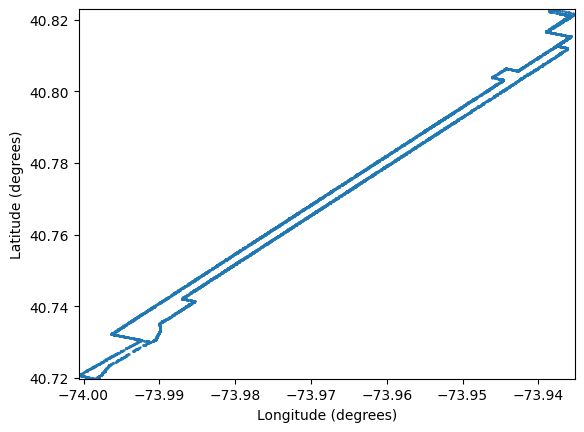

In [ ]:
#Longtitude and Latitude plot of M1
import matplotlib.pyplot as plt

df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

plt.scatter(df['Longitude'], df['Latitude'],s=0.5)

plt.xlim(min(df['Longitude']), max(df['Longitude']))
plt.ylim(min(df['Latitude']), max(df['Latitude']))

plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

plt.show()

In [ ]:
df_soho = df[df['Destination']=='SOHO CENTRE ST via 5 AV/ via BROADWAY']
df_soho.head()

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin
13,2024-04-24T08:57:16.507-04:00,MTA NYCT_9495,40.813527,-73.937056,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284
14,2024-04-24T08:57:16.507-04:00,MTA NYCT_9576,40.790384,-73.953956,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284
23,2024-04-24T08:57:47.268-04:00,MTA NYCT_9495,40.812395,-73.937890,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284
36,2024-04-24T08:57:47.268-04:00,MTA NYCT_9576,40.789069,-73.954913,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284
57,2024-04-24T08:58:18.013-04:00,MTA NYCT_9576,40.789030,-73.954942,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284


In [ ]:
import numpy as np

def haversine(LT1, LN1, LT2, LN2):
    R = 6371.0
    LT1, LN1, LT2, LN2 = map(np.radians, [LT1, LN1, LT2, LN2])
    difLT = LT2 - LT1
    difLN = LN2 - LN1
    a = np.sin(difLT/2)**2 + np.cos(LT1) * np.cos(LT2) * np.sin(difLN/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

In [ ]:
df_soho = df_soho.drop_duplicates(subset=['ResponseTimestamp','VehicleRef'])
df_soho['ResponseTimestamp'] = pd.to_datetime(df['ResponseTimestamp'])

df_soho.sort_values(by=['VehicleRef', 'ResponseTimestamp'], inplace=True)

df_soho['latitude_diff'] = df_soho.groupby('VehicleRef')['Latitude'].diff()
df_soho['longitude_diff'] = df_soho.groupby('VehicleRef')['Longitude'].diff()

df_soho['time_diff'] = df_soho.groupby('VehicleRef')['ResponseTimestamp'].diff().dt.total_seconds() / 3600

df_soho['distance'] = df_soho.apply(lambda x: haversine(x['Latitude'] - x['latitude_diff'], x['Longitude'] - x['longitude_diff'], x['Latitude'], x['Longitude']) if not pd.isna(x['latitude_diff']) else np.nan, axis=1)

df_soho['speed_kmh'] = df_soho['distance'] / df_soho['time_diff']
df_soho['speed_kmh'] = df_soho['speed_kmh'].replace([np.inf, -np.inf], np.nan).fillna(0)
df_soho.head()

,ResponseTimestamp,VehicleRef,Latitude,Longitude,Destination,Origin,latitude_diff,longitude_diff,time_diff,distance,speed_kmh
13133,2024-04-24 15:17:35.478000-04:00,MTA NYCT_9466,40.821062,-73.935851,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284,NaN,NaN,NaN,NaN,0.000000
13157,2024-04-24 15:18:07.493000-04:00,MTA NYCT_9466,40.821062,-73.935851,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284,0.000000,0.000000,0.008893,0.000000,0.000000
13191,2024-04-24 15:18:39.447000-04:00,MTA NYCT_9466,40.820753,-73.936087,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284,-0.000309,-0.000236,0.008876,0.039685,4.471032
13225,2024-04-24 15:19:11.604000-04:00,MTA NYCT_9466,40.820207,-73.936496,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284,-0.000546,-0.000409,0.008932,0.069789,7.812925
13249,2024-04-24 15:19:43.619000-04:00,MTA NYCT_9466,40.820134,-73.936549,SOHO CENTRE ST via 5 AV/ via BROADWAY,MTA_405284,-0.000073,-0.000053,0.008893,0.009262,1.041458


# STOPS

Measure the latitude and longitude of stops:

1. Broadway / West Houston St: 40.72519199227711, -73.99717976375459
2. Broadway / Bleecker St: 40.72630986165661, -73.99578137861597

Intersection between these two stops:
40.725468364596196, -73.99677813899713


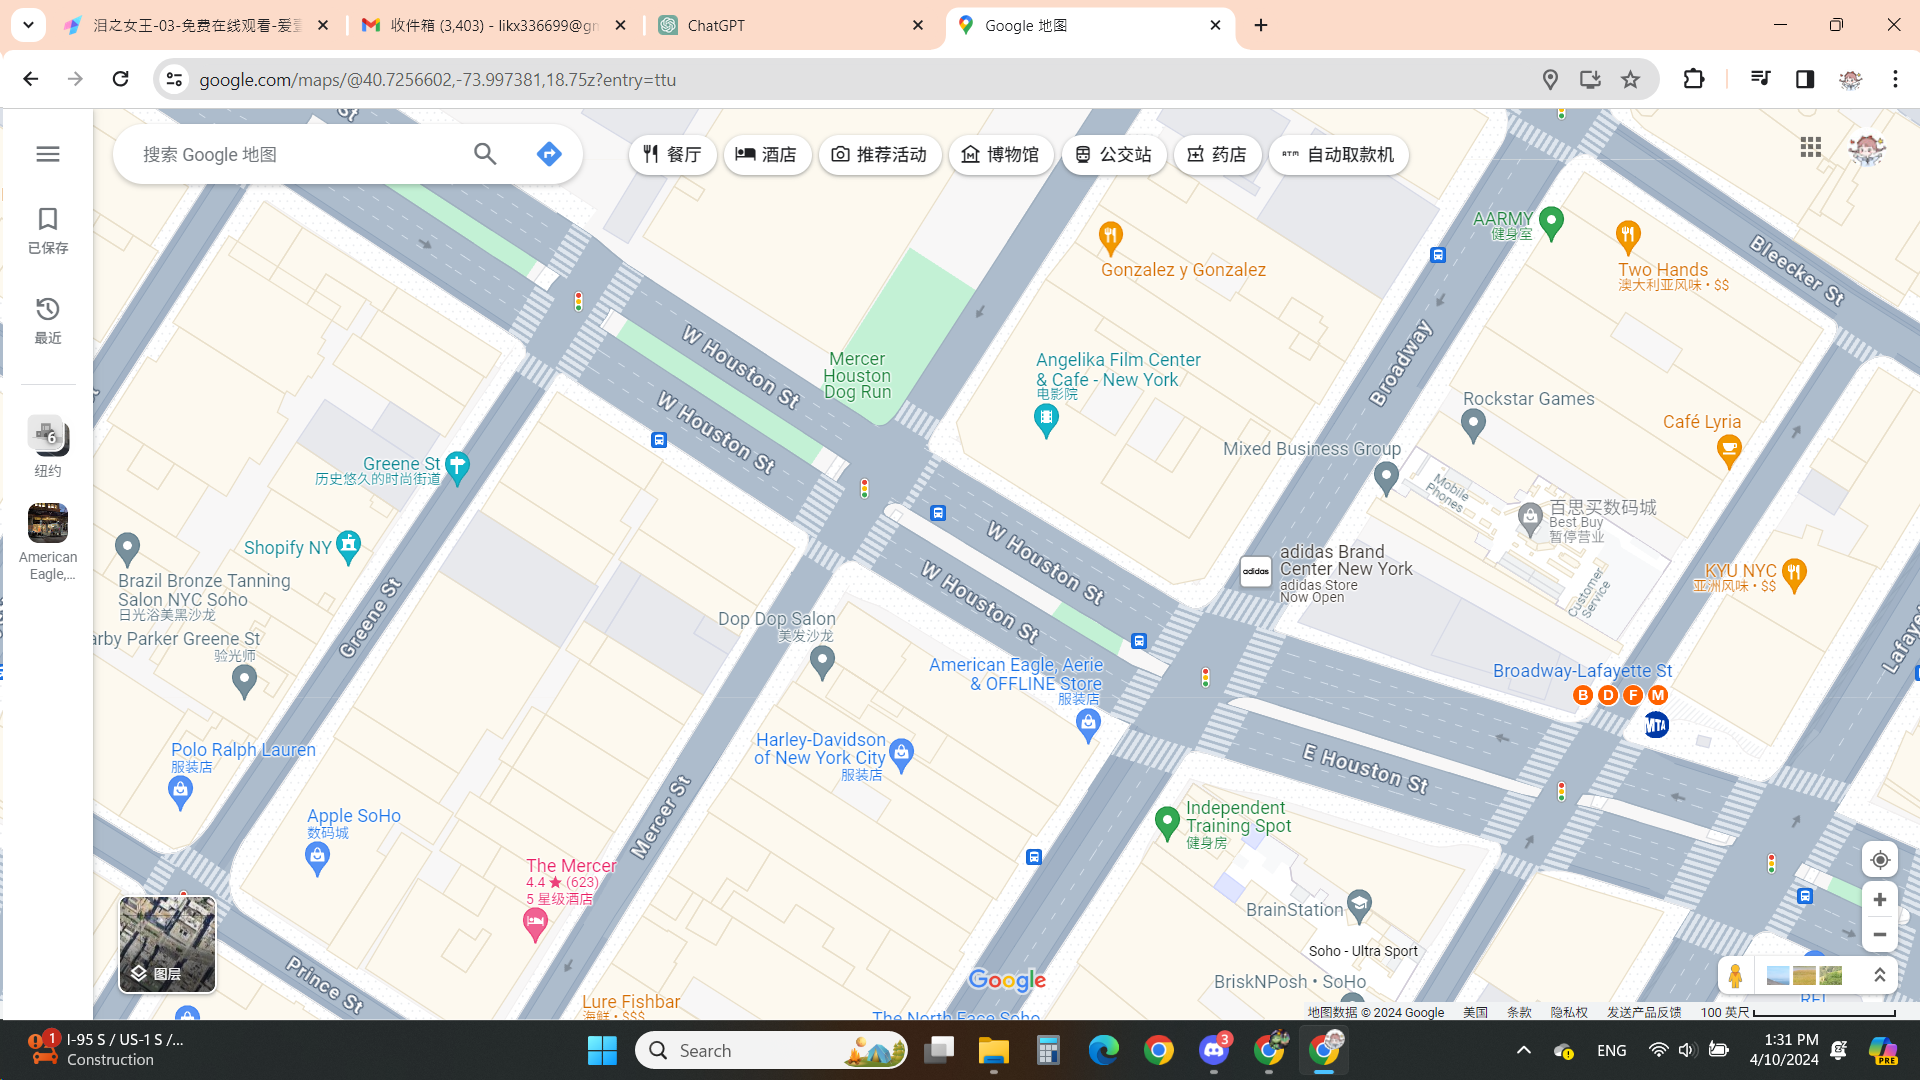

In [ ]:
#coordinates

stop1_coords = (40.72630986165661, -73.99578137861597)
stop2_coords = (40.72519199227711, -73.99717976375459)
intersection_coords = (40.725468364596196, -73.99677813899713)

# Equation 1

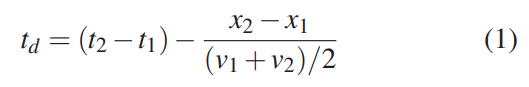

In [ ]:
# distance from intersection
df_soho['position'] = df_soho.apply(
    lambda row: haversine(row['Latitude'], row['Longitude'], intersection_coords[0], intersection_coords[1]), axis=1)

# intervals before & after the intersection
before_intersection_interval = (0, 0.1)  # in km
after_intersection_interval = (0.17, 0.22)  # in km

# within the intervals
before_intersection_passes = df_soho[
    (df_soho['position'] >= before_intersection_interval[0]) &
    (df_soho['position'] <= before_intersection_interval[1])
]
after_intersection_passes = df_soho[
    (df_soho['position'] >= after_intersection_interval[0]) &
    (df_soho['position'] <= after_intersection_interval[1])
]

bus_passes_near_intersection = pd.concat([before_intersection_passes, after_intersection_passes])

bus_passes_near_intersection = bus_passes_near_intersection[bus_passes_near_intersection['speed_kmh'] >= 5] # Filter out low velocity

# Sort df
bus_passes_near_intersection.sort_values(by=['VehicleRef', 'ResponseTimestamp'], inplace=True)

# calculate 'td'
def calculate_td(group):
    before = group[(group['position'] >= before_intersection_interval[0]) &
                   (group['position'] <= before_intersection_interval[1])]
    after = group[(group['position'] >= after_intersection_interval[0]) &
                  (group['position'] <= after_intersection_interval[1])]

    if before.empty or after.empty:
        return None

    before = before.iloc[-1]
    after = after.iloc[0]
    t1 = before['ResponseTimestamp']
    t2 = after['ResponseTimestamp']
    x1 = before['position']
    x2 = after['position']
    v1 = before['speed_kmh']
    v2 = after['speed_kmh']
    td = ((t2 - t1).total_seconds()/3600) - ((x2 - x1) / ((v1 + v2) / 2))
    return td

# 'td' for each VehicleRef
td_values = bus_passes_near_intersection.groupby('VehicleRef').apply(calculate_td)

# Map back
bus_passes_near_intersection['td'] = bus_passes_near_intersection['VehicleRef'].map(td_values)

# new df
bus_passes_near_intersection[['ResponseTimestamp', 'VehicleRef', 'position', 'speed_kmh', 'td']].head()


,ResponseTimestamp,VehicleRef,position,speed_kmh,td
10767,2024-04-24 14:15:00.319000-04:00,MTA NYCT_9467,0.058925,11.700873,0.004335
10798,2024-04-24 14:16:03.814000-04:00,MTA NYCT_9467,0.190294,8.049520,0.004335
5222,2024-04-24 11:04:34.197000-04:00,MTA NYCT_9468,0.072380,8.604992,-3.977776
5239,2024-04-24 11:05:04.774000-04:00,MTA NYCT_9468,0.026689,5.381808,-3.977776
5260,2024-04-24 11:05:35.549000-04:00,MTA NYCT_9468,0.214741,28.231013,-3.977776


# Equation 2 & 3

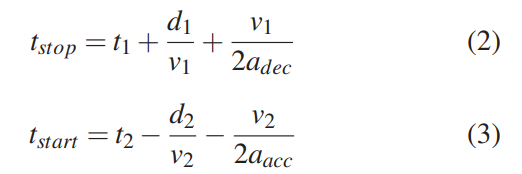

In [ ]:
import numpy as np
import pandas as pd

a_dec = 1.5  #  m/s²
a_acc = 1.0  #  m/s²

bus_passes_near_intersection['speed_ms'] = bus_passes_near_intersection['speed_kmh'] / 3.6        # m/s

# td > 0 then the bus has stopped
df_stopped_buses = bus_passes_near_intersection[bus_passes_near_intersection['td'] > 0]


# Function
def calculate_stop_start_times(row, a_dec, a_acc, intersection_lat, intersection_lon):
    v1 = max(row['speed_ms'], 0.01)
    v2 = v1  # for simplicity

    d1 = haversine(row['Latitude'], row['Longitude'], intersection_lat, intersection_lon) * 1000
    d2 = d1  # for simplicity

    # t_stop and t_start: EQUATION 2&3
    t_stop_seconds = d1 / v1 + v1 / (2 * a_dec)
    t_start_seconds = d2 / v2 + v2 / (2 * a_acc)

    # Convert seconds to timedelta
    t_stop_timedelta = pd.to_timedelta(t_stop_seconds, unit='s')
    t_start_timedelta = pd.to_timedelta(t_start_seconds, unit='s')
    t_stop = row['ResponseTimestamp'] + t_stop_timedelta
    t_start = row['ResponseTimestamp'] - t_start_timedelta

    return t_stop, t_start

# apply equation
df_stopped_buses[['t_stop', 't_start']] = df_stopped_buses.apply(
    lambda row: calculate_stop_start_times(row, a_dec, a_acc, intersection_coords[0], intersection_coords[1]),
    axis=1,
    result_type="expand"
)

df_stopped_buses[['VehicleRef', 'ResponseTimestamp', 'speed_kmh', 'td', 't_stop', 't_start']].head()

<ipython-input-108-29b60b02f44b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses[['t_stop', 't_start']] = df_stopped_buses.apply(
<ipython-input-108-29b60b02f44b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses[['t_stop', 't_start']] = df_stopped_buses.apply(


,VehicleRef,ResponseTimestamp,speed_kmh,td,t_stop,t_start
10767,MTA NYCT_9467,2024-04-24 14:15:00.319000-04:00,11.700873,0.004335,2024-04-24 14:15:19.531710543-04:00,2024-04-24 14:14:40.564582391-04:00
10798,MTA NYCT_9467,2024-04-24 14:16:03.814000-04:00,8.049520,0.004335,2024-04-24 14:17:29.664910258-04:00,2024-04-24 14:14:37.590426765-04:00
3130,MTA NYCT_9495,2024-04-24 10:09:50.596000-04:00,27.655297,0.000951,2024-04-24 10:09:56.974642045-04:00,2024-04-24 10:09:42.937020118-04:00
3172,MTA NYCT_9495,2024-04-24 10:10:51.821000-04:00,15.039387,0.000951,2024-04-24 10:11:16.159958441-04:00,2024-04-24 10:10:26.785773620-04:00
3197,MTA NYCT_9495,2024-04-24 10:11:22.571000-04:00,12.029363,0.000951,2024-04-24 10:12:23.119098490-04:00,2024-04-24 10:10:21.465986570-04:00


# Equation 4

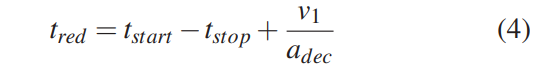

The duration of red “observed” by a particular bus is then
estimated by Equation 4. where v_1/a_dec is the time it takes a bus to come to a full stop after the driver detects the signal is red. Aggregating tred for a sufficiently large number of bus passes will later lead to an estimate of total red duration of a phase.

In [ ]:
# observed red light duration: 't_red'
def calculate_t_red(row, a_dec):
    v1_ms = max(row['speed_ms'], 0.01)
    t_red_seconds = (row['t_start'] - row['t_stop']).total_seconds() + v1_ms / a_dec
    return t_red_seconds

df_stopped_buses['t_red'] = df_stopped_buses.apply(lambda row: calculate_t_red(row, a_dec), axis=1)

# new df
df_stopped_buses[['VehicleRef', 'ResponseTimestamp', 'speed_kmh', 'td', 't_stop', 't_start', 't_red']].head()

<ipython-input-109-b8b5a8c535fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['t_red'] = df_stopped_buses.apply(lambda row: calculate_t_red(row, a_dec), axis=1)


,VehicleRef,ResponseTimestamp,speed_kmh,td,t_stop,t_start,t_red
10767,MTA NYCT_9467,2024-04-24 14:15:00.319000-04:00,11.700873,0.004335,2024-04-24 14:15:19.531710543-04:00,2024-04-24 14:14:40.564582391-04:00,-36.800301
10798,MTA NYCT_9467,2024-04-24 14:16:03.814000-04:00,8.049520,0.004335,2024-04-24 14:17:29.664910258-04:00,2024-04-24 14:14:37.590426765-04:00,-170.583832
3130,MTA NYCT_9495,2024-04-24 10:09:50.596000-04:00,27.655297,0.000951,2024-04-24 10:09:56.974642045-04:00,2024-04-24 10:09:42.937020118-04:00,-8.916271
3172,MTA NYCT_9495,2024-04-24 10:10:51.821000-04:00,15.039387,0.000951,2024-04-24 10:11:16.159958441-04:00,2024-04-24 10:10:26.785773620-04:00,-46.589113
3197,MTA NYCT_9495,2024-04-24 10:11:22.571000-04:00,12.029363,0.000951,2024-04-24 10:12:23.119098490-04:00,2024-04-24 10:10:21.465986570-04:00,-119.425452


# Equation 5

In equation 5, the velocity v is expressed as a function of distance x, assuming constant acceleration.

The equation is as below:


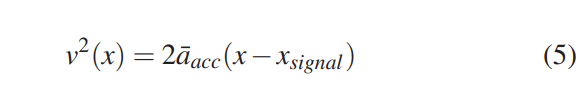


In the equation, acc is the average acceleration and x_signal is the position of the traffic signal.

Since the acceleration is constant, we can rearrange the equation to calculate the average acceleration based on the observed velocities and distances from the intersection. However, the equation also assumes that the bus starts from a full stop at the signal, which means we need to take into account only the data where the bus is starting its movement from the intersection coordinate.

In [ ]:
df_stopped_buses['distance_from_signal'] = df_stopped_buses.apply(lambda x: haversine(x['Latitude'], x['Longitude'],
                                                          intersection_coords[0], intersection_coords[1]), axis=1)

df_stopped_buses['speed_ms'] = df_stopped_buses['speed_kmh']/3.6
# Apply the equation to calculate the average acceleration
# Assuming the velocity at the signal (v_signal) is 0, because the bus starts from a full stop
df_stopped_buses['a_acc'] = df_stopped_buses.apply(lambda x: (x['speed_ms'] ** 2) / (2 * (x['distance_from_signal'])
                      if x['distance_from_signal'] > 0 else np.nan), axis=1)

# Now we can calculate the average acceleration
average_a_acc = df_stopped_buses['a_acc'].mean()

# Print the result
print(f"The estimated average acceleration is {average_a_acc} m/s²")

The estimated average acceleration is 245.59080145436343 m/s²


<ipython-input-110-c51ecbb1bf06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['distance_from_signal'] = df_stopped_buses.apply(lambda x: haversine(x['Latitude'], x['Longitude'],
<ipython-input-110-c51ecbb1bf06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['speed_ms'] = df_stopped_buses['speed_kmh']/3.6
<ipython-input-110-c51ecbb1bf06>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

# Equation 7

Equation 7 calculates the time difference between the starts of green signals as observed by the buses accelerating from a stop.

 the time between approximated start of greens: b_g

 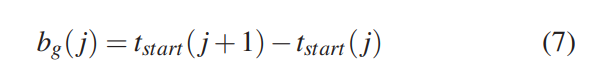

In [ ]:
df_stopped_buses.sort_values(by='t_start', inplace=True)

# Calculate the difference in 't_start' for consecutive buses
df_stopped_buses['t_start_shifted'] = df_stopped_buses['t_start'].shift(-1)
df_stopped_buses['bg'] = (df_stopped_buses['t_start_shifted'] - df_stopped_buses['t_start']).dt.total_seconds()

# Display the 'bg' values
df_stopped_buses[['VehicleRef', 't_start', 'bg']]

<ipython-input-111-677181c12db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses.sort_values(by='t_start', inplace=True)
<ipython-input-111-677181c12db8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['t_start_shifted'] = df_stopped_buses['t_start'].shift(-1)
<ipython-input-111-677181c12db8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,VehicleRef,t_start,bg
3130,MTA NYCT_9495,2024-04-24 10:09:42.937020118-04:00,38.528966
3197,MTA NYCT_9495,2024-04-24 10:10:21.465986570-04:00,5.319787
3172,MTA NYCT_9495,2024-04-24 10:10:26.785773620-04:00,14650.804653
10798,MTA NYCT_9467,2024-04-24 14:14:37.590426765-04:00,2.974156
10767,MTA NYCT_9467,2024-04-24 14:14:40.564582391-04:00,NaN


# Equation 8

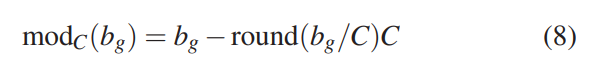

Equation 8 calculates the remainder of division of bg by the cycle time C and allows for negative values, we can define a custom modulo function that accounts for this requirement.

This equation adjusts the typical modulo operation to account for cycle time. It's similar to the modulo operation but differs in that it can give negative results. For example, using a cycle time C of 10 seconds, mod_10(12) would be 2 because 12 - (10 · round(12/10)) is 12 - 10, which is 2, and  (8) would be -2 because 8 - (10 · round(8/10)) is 8 - 10, which is -2.

In [ ]:
# Assuming C is already defined
C = 60

# Fill NaN values with 0 or another appropriate value for your context
df_stopped_buses['bg'] = df_stopped_buses['bg'].fillna(0)

# Ensure bg is treated as integer seconds (since bg is a time difference, it is reasonable to round it to the nearest second)
df_stopped_buses['bg'] = df_stopped_buses['bg'].astype(int)

# Define the custom mod function
def mod_C(bg, C):
    return bg - round(bg / C) * C

# Apply the custom mod function to calculate the mod_C(bg) values
df_stopped_buses['mod_C_bg'] = df_stopped_buses['bg'].apply(lambda bg: mod_C(bg, C))

# Display the 'mod_C_bg' values
df_stopped_buses[['VehicleRef', 't_start', 'bg', 'mod_C_bg']].head()


<ipython-input-112-ca83f6b41ad0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['bg'] = df_stopped_buses['bg'].fillna(0)
<ipython-input-112-ca83f6b41ad0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['bg'] = df_stopped_buses['bg'].astype(int)
<ipython-input-112-ca83f6b41ad0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,VehicleRef,t_start,bg,mod_C_bg
3130,MTA NYCT_9495,2024-04-24 10:09:42.937020118-04:00,38,-22
3197,MTA NYCT_9495,2024-04-24 10:10:21.465986570-04:00,5,5
3172,MTA NYCT_9495,2024-04-24 10:10:26.785773620-04:00,14650,10
10798,MTA NYCT_9467,2024-04-24 14:14:37.590426765-04:00,2,2
10767,MTA NYCT_9467,2024-04-24 14:14:40.564582391-04:00,0,0


# Equation 9

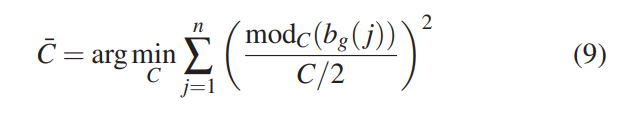

Equation (9) suggests an optimization problem to find the cycle time C that minimizes the sum of squared normalized modulo values of bg. This involves trying out different cycle times and calculating the sum of squared remainders, divided by half of the trial cycle time.

This can be implemented as an optimization problem in Python, using a numerical optimization method.

In [ ]:
from scipy.optimize import minimize_scalar

# Define the objective function to minimize
def objective_function(C, bg_values):
    if C == 0:
        return np.inf
    return np.sum(np.square(bg_values / (C / 2)))

# A good starting point could be the median value of the bg differences.
initial_guess = df_stopped_buses['bg'].median()

# Ensure initial_guess is not zero to avoid division by zero in the objective function
if initial_guess == 0:
    initial_guess = 1

# Run the optimization
result = minimize_scalar(
    objective_function,
    args=(df_stopped_buses['mod_C_bg'].dropna().values,),
    method='bounded',
    bounds=(0.1, 2 * initial_guess)
)

# The cycle time C_hat that minimizes the objective function
C_hat = result.x

print(f"The estimated cycle time is {C_hat} seconds")

The estimated cycle time is 9.999996005397831 seconds


# Equation 10

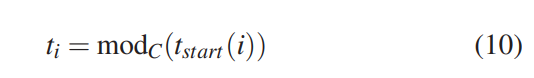

where t_start(i) is the timestamp when the i-th bus starts accelerating from the intersection, and mod_C is the modulo operation with respect to the cycle time C which maps the timestamps to a single reference interval of [-C/2, C/2] This maps the estimate of the start of green to a reference period that centers around zero.


The implementation of this in Python can be done by applying the mod_C function we've previously defined to the t_start values. However, since the t_start values are in datetime format, we first need to convert these timestamps to a numerical scale (e.g., seconds past a certain reference time) so that the modulo operation makes sense.

In [ ]:
df_stopped_buses['t_start'].dt.floor('D')

3130    2024-04-24 00:00:00-04:00
3197    2024-04-24 00:00:00-04:00
3172    2024-04-24 00:00:00-04:00
10798   2024-04-24 00:00:00-04:00
10767   2024-04-24 00:00:00-04:00
Name: t_start, dtype: datetime64[ns, UTC-04:00]

In [ ]:
# Convert t_start to seconds from a reference time (e.g., midnight of the day of the first timestamp)
# It's important that all t_start values are from the same day for this to work correctly
reference_time = df_stopped_buses['t_start'].dt.floor('D')  # This takes the day component of the first t_start time
df_stopped_buses['t_start_seconds'] = (df_stopped_buses['t_start'] - reference_time).dt.total_seconds()

# Apply the mod_C function with C_hat as the cycle time
df_stopped_buses['t_i'] = df_stopped_buses['t_start_seconds'].apply(lambda x: mod_C(x, C_hat))

# Map the t_i values to the interval [-C_hat/2, C_hat/2]
df_stopped_buses['t_i_mapped'] = df_stopped_buses['t_i'].apply(lambda x: x if x <= C_hat/2 else x - C_hat)

# Display the t_i_mapped values
df_stopped_buses[['VehicleRef', 't_start', 't_start_seconds', 't_i', 't_i_mapped']].head()

<ipython-input-115-4a972dcb677a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['t_start_seconds'] = (df_stopped_buses['t_start'] - reference_time).dt.total_seconds()
<ipython-input-115-4a972dcb677a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['t_i'] = df_stopped_buses['t_start_seconds'].apply(lambda x: mod_C(x, C_hat))
<ipython-input-115-4a972dcb677a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,VehicleRef,t_start,t_start_seconds,t_i,t_i_mapped
3130,MTA NYCT_9495,2024-04-24 10:09:42.937020118-04:00,36582.937020,2.951632,2.951632
3197,MTA NYCT_9495,2024-04-24 10:10:21.465986570-04:00,36621.465987,1.480615,1.480615
3172,MTA NYCT_9495,2024-04-24 10:10:26.785773620-04:00,36626.785774,-3.199594,-3.199594
10798,MTA NYCT_9467,2024-04-24 14:14:37.590426765-04:00,51277.590427,-2.389089,-2.389089
10767,MTA NYCT_9467,2024-04-24 14:14:40.564582391-04:00,51280.564582,0.585067,0.585067


# Equation 11

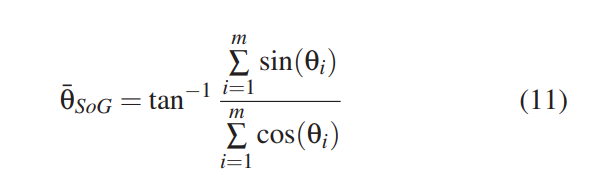

Equation (11) computes the average start of green signals (𝛿_SoG) using circular statistics. This is done by converting the t_i values into angles on a circle and then finding the average angle.

The average angle, **θ¯ SoG**, is determined by the direction of the vector sum of all individual vectors:

**m** represents the number of samples used to calculate the
moving average.

In [ ]:
# angles theta_i
df_stopped_buses['theta_i'] = (2 * np.pi / C_hat) * df_stopped_buses['t_i_mapped']

# vector sum of all the sin(theta_i) and cos(theta_i)
sum_sin_theta = np.sum(np.sin(df_stopped_buses['theta_i']))
sum_cos_theta = np.sum(np.cos(df_stopped_buses['theta_i']))

# delta_SoG
delta_SoG = np.arctan2(sum_sin_theta, sum_cos_theta)

# Convert the average angle from radians to the corresponding time

# 1. normalize the angle between 0 and 2*pi
if delta_SoG < 0:
    delta_SoG += 2 * np.pi

# 2. convert the angle back to time
average_start_of_green_time = (delta_SoG * C_hat) / (2 * np.pi)

# 3. convert the time back to a clock time from the reference time
average_start_of_green_clock_time = reference_time + pd.to_timedelta(average_start_of_green_time, unit='s')

# average_start_of_green_time

average_start_of_green_clock_time
# print(f"The average start of green is at {average_start_of_green_clock_time}")

<ipython-input-116-b8b6665dd839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['theta_i'] = (2 * np.pi / C_hat) * df_stopped_buses['t_i_mapped']


3130    2024-04-24 00:00:00.381446721-04:00
3197    2024-04-24 00:00:00.381446721-04:00
3172    2024-04-24 00:00:00.381446721-04:00
10798   2024-04-24 00:00:00.381446721-04:00
10767   2024-04-24 00:00:00.381446721-04:00
Name: t_start, dtype: datetime64[ns, UTC-04:00]

# Equation 12

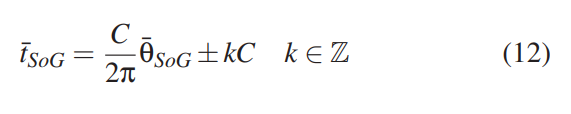

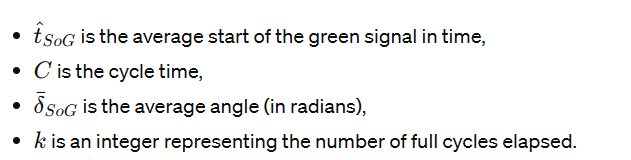

Since k can be any integer, the equation defines a set of possible times that are all valid within the context of a periodic cycle. Typically, the value of k that gives a time within the range of your observed data would be chosen.

t_SoG bar: The average start of the green

To find the correct k value, we need to find the t_SoG_hat value that is closest to our observed t_start values. Since t_start is already in seconds from a reference time, we can find the k that minimizes the difference between t_SoG_hat and the observed t_start values within one cycle time

In [ ]:
t_SoG_hat = (C_hat / (2 * np.pi)) * delta_SoG


def find_closest_k(t_SoG_hat, t_start_seconds, C):
    k_min = int((t_start_seconds.min() - t_SoG_hat) // C)
    k_max = int((t_start_seconds.max() - t_SoG_hat) // C)
    k_values = range(k_min, k_max + 1)
    closest_k = min(k_values, key=lambda k: abs((t_SoG_hat + k * C) - t_start_seconds.mean()))
    return closest_k

k = find_closest_k(t_SoG_hat, df_stopped_buses['t_start_seconds'], C_hat)

t_SoG_hat_adjusted = t_SoG_hat + k * C_hat

average_start_of_green_clock_time = reference_time + pd.to_timedelta(t_SoG_hat_adjusted, unit='s')

# print(f"The average start of the green signal is at {average_start_of_green_clock_time}")

average_start_of_green_clock_time

3130    2024-04-24 11:48:00.364477651-04:00
3197    2024-04-24 11:48:00.364477651-04:00
3172    2024-04-24 11:48:00.364477651-04:00
10798   2024-04-24 11:48:00.364477651-04:00
10767   2024-04-24 11:48:00.364477651-04:00
Name: t_start, dtype: datetime64[ns, UTC-04:00]

# Equation 13

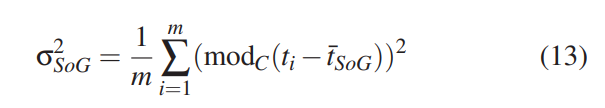

Equation (13) describes how to calculate the variance of the estimate of the start of the green signal (𝜎_𝑆𝑜𝐺). This involves taking the cyclic differences of the t_i values from the estimated average start time (t_SoG hat), squaring them, and averaging the results. The cyclic difference is taken using the mod_C operation.

In [ ]:
# The code assumes that df_stopped_buses['t_i_mapped'] and t_SoG_hat_adjusted are already defined

# Define the function to compute the squared cyclic difference
def squared_cyclic_difference(t_i, t_SoG_hat, C):
    # Compute the difference and apply mod_C to find the cyclic distance
    cyclic_difference = mod_C(t_i - t_SoG_hat, C)
    # Map to the interval [-C/2, C/2]
    if cyclic_difference > C / 2:
        cyclic_difference -= C
    # Return the squared cyclic difference
    return cyclic_difference ** 2

# Compute the squared cyclic differences for all t_i values
df_stopped_buses['squared_cyclic_diff'] = df_stopped_buses['t_i_mapped'].apply(
    lambda t_i: squared_cyclic_difference(t_i, t_SoG_hat_adjusted, C_hat))

# Calculate the variance
sigma_SoG_squared = df_stopped_buses['squared_cyclic_diff'].mean()

print(f"The variance of the estimate is {sigma_SoG_squared}")

The variance of the estimate is 5.671041460834592


<ipython-input-118-319f1be5ae2b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopped_buses['squared_cyclic_diff'] = df_stopped_buses['t_i_mapped'].apply(


# Equation 14 & 15

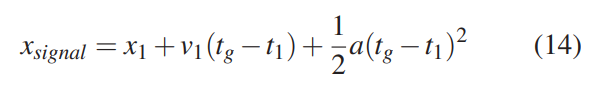

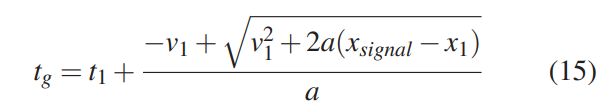

Equation (14) provides a way to interpolate the point in time t_g at which a bus signal was green. It uses the positions x_1 and x_2, the velocities v_1 and v_2, and the update times t_1 and t_2 to estimate
x_signal, the position at the signal.

A zero value for **td** indicates (with high likelihood) that the bus passed
through a green, and its acceleration between two update points remained constant

**tg** denotes a time at which the signal was green

In [ ]:
C = 60

def calculate_additional_values(group):
    before = group[(group['position'] >= before_intersection_interval[0]) &
                   (group['position'] <= before_intersection_interval[1])]
    after = group[(group['position'] >= after_intersection_interval[0]) &
                  (group['position'] <= after_intersection_interval[1])]

    if before.empty or after.empty:
        return None

    before = before.iloc[-1]
    after = after.iloc[0]

    t1 = before['ResponseTimestamp']
    t2 = after['ResponseTimestamp']
    x1 = before['position']
    x2 = after['position']
    v1 = before['speed_kmh'] / 3.6  # Convert speed to m/s
    v2 = after['speed_kmh'] / 3.6   # Convert speed to m/s

    a = (v2 - v1) / ((t2 - t1).total_seconds())

    # ------------------------------------------------ Equation 14 --------------------------------------------------

    x_signal = haversine(intersection_coords[0], intersection_coords[1], before['Latitude'], before['Longitude'])

    # ------------------------------------------------ Equation 15 --------------------------------------------------

    t_g_seconds = (-v1 + np.sqrt(v1**2 + 2 * a * (x_signal - x1))) / a
    t_g = t1 + pd.to_timedelta(t_g_seconds, unit='s')

    t_g_mapped = ((t_g - t1).total_seconds()) % C

    return pd.Series({'a': a, 't_g': t_g, 't_g_mapped': t_g_mapped})



additional_values = bus_passes_near_intersection.groupby('VehicleRef').apply(calculate_additional_values)
bus_passes_near_intersection = bus_passes_near_intersection.join(additional_values, on='VehicleRef')

bus_passes_near_intersection[['ResponseTimestamp', 'VehicleRef', 'position', 'speed_kmh', 'td', 'a', 't_g', 't_g_mapped']]

,ResponseTimestamp,VehicleRef,position,speed_kmh,td,a,t_g,t_g_mapped
10767,2024-04-24 14:15:00.319000-04:00,MTA NYCT_9467,0.058925,11.700873,0.004335,-0.015974,2024-04-24 14:15:00.319000-04:00,0.0
10798,2024-04-24 14:16:03.814000-04:00,MTA NYCT_9467,0.190294,8.049520,0.004335,-0.015974,2024-04-24 14:15:00.319000-04:00,0.0
5222,2024-04-24 11:04:34.197000-04:00,MTA NYCT_9468,0.072380,8.604992,-3.977776,-0.000426,2024-04-24 15:03:40.949000-04:00,0.0
5239,2024-04-24 11:05:04.774000-04:00,MTA NYCT_9468,0.026689,5.381808,-3.977776,-0.000426,2024-04-24 15:03:40.949000-04:00,0.0
5260,2024-04-24 11:05:35.549000-04:00,MTA NYCT_9468,0.214741,28.231013,-3.977776,-0.000426,2024-04-24 15:03:40.949000-04:00,0.0
12369,2024-04-24 14:59:26.324000-04:00,MTA NYCT_9468,0.201195,10.853018,-3.977776,-0.000426,2024-04-24 15:03:40.949000-04:00,0.0
12440,2024-04-24 15:01:00.044000-04:00,MTA NYCT_9468,0.077716,6.654932,-3.977776,-0.000426,2024-04-24 15:03:40.949000-04:00,0.0
12498,2024-04-24 15:02:36.386000-04:00,MTA NYCT_9468,0.007967,5.476182,-3.977776,-0.000426,2024-04-24 15:03:40.949000-04:00,0.0
12535,2024-04-24 15:03:40.949000-04:00,MTA NYCT_9468,0.048691,6.330614,-3.977776,-0.000426,2024-04-24 15:03:40.949000-04:00,0.0
6736,2024-04-24 11:46:28.394000-04:00,MTA NYCT_9482,0.099246,15.927285,NaN,NaN,NaT,NaN
